PROBLEM STATEMENT: 

    estimate deathrate 

By: Prem S Rajanampalle, REI Intercollege, Dayalbagh, Agra

The dataset link: 

# Table of Contents:
1. Data Description 
2. EDA
3. Data Preprocessing 
4. Splitting 
5. Models:
    1. LR
    2. KNN
    3. XGB
    4. ADA
    5. DT
    6. RF
    7. SVC

## Data description 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
ds = pd.read_csv("cancer_reg.csv", encoding='latin-1')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [42]:
ds.head(30)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,...,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,...,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,...,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,...,NaN,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430


Conclusion: 
    
    1. Drop binnedinc 
    2. Drop Geography
    3. Need imputing 
    4. Feature Scalling 

### EDA

In [43]:
# Dropping objects

In [4]:
drop_list = ['binnedInc', 'Geography']
ds = ds.drop(drop_list, axis = 1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

In [5]:
# Imputing
ds = ds.fillna(ds.median())

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'TARGET_deathRate'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>],
       [<Axes: title={'center': 'povertyPercent'}>,
        <Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>],
       [<Axes: title={'center': 'PercentMarried'}>,
        <Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctSomeCol18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>],
       [<Axes: title={'center': 'PctBachDeg25_Over'}>,
        <Axes: title={'cent

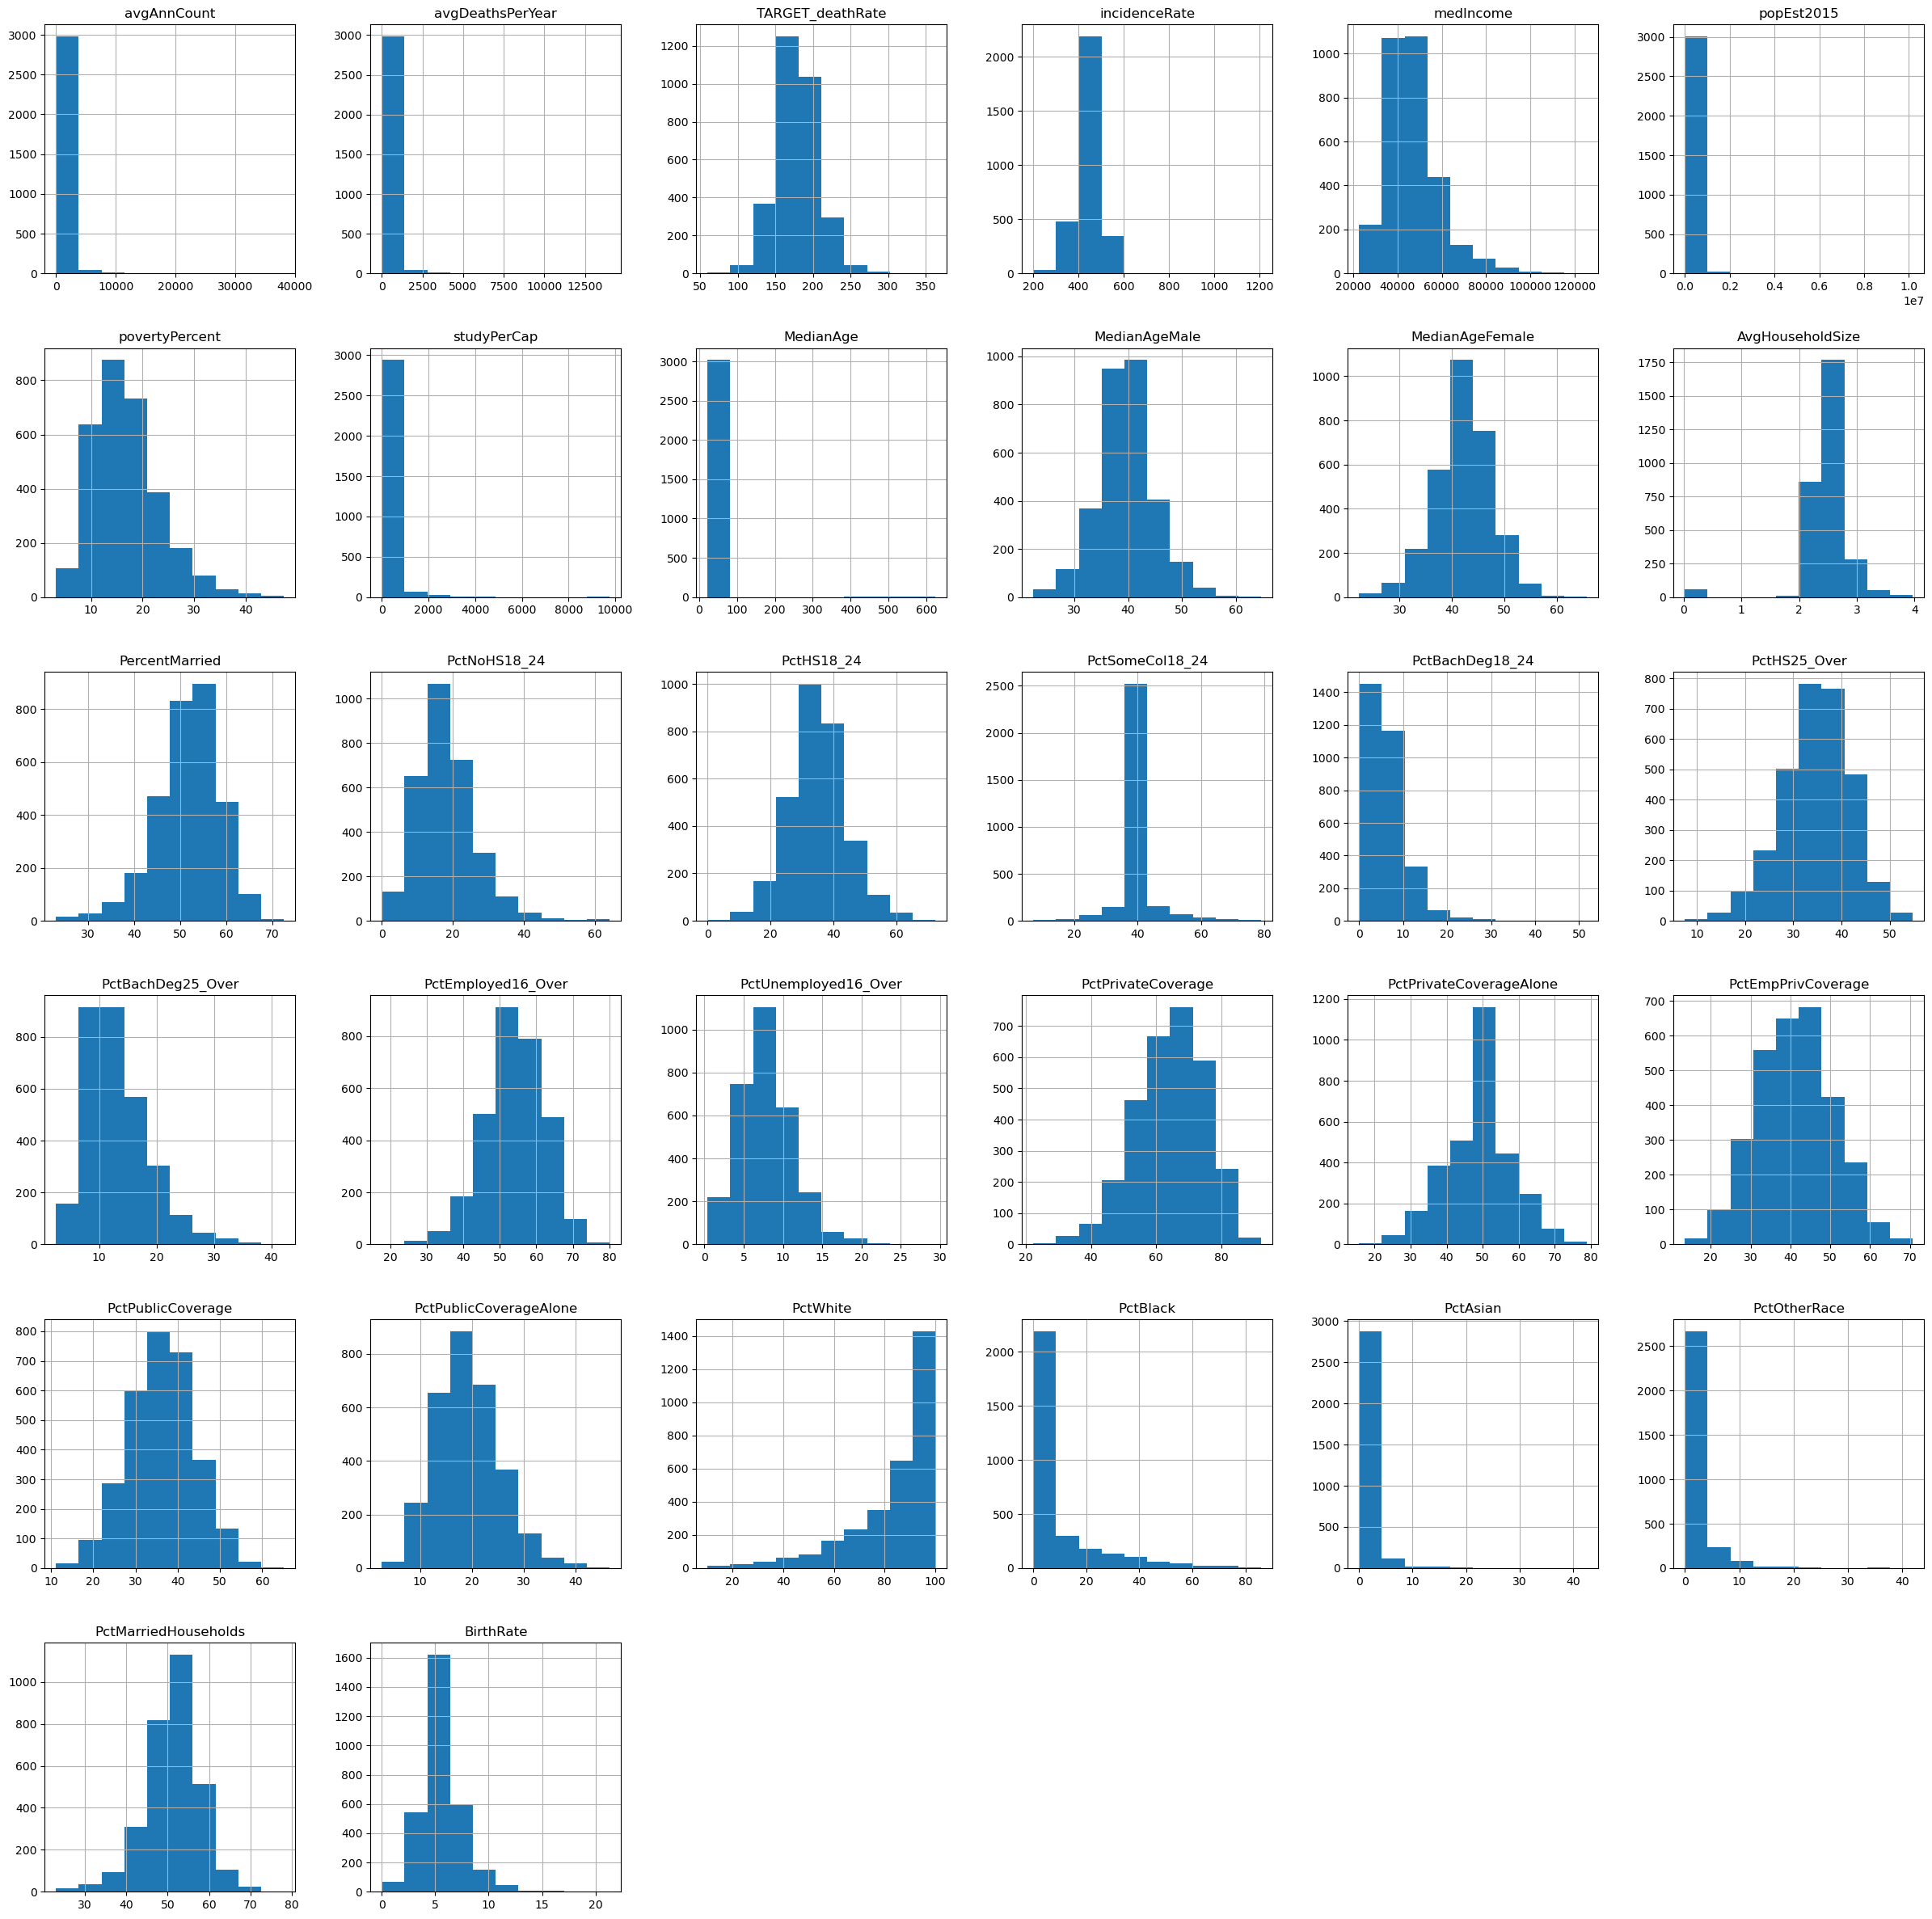

In [7]:
# UNIVARIATE ANALYSIS

ds.hist(figsize = (30, 30))

<Axes: >

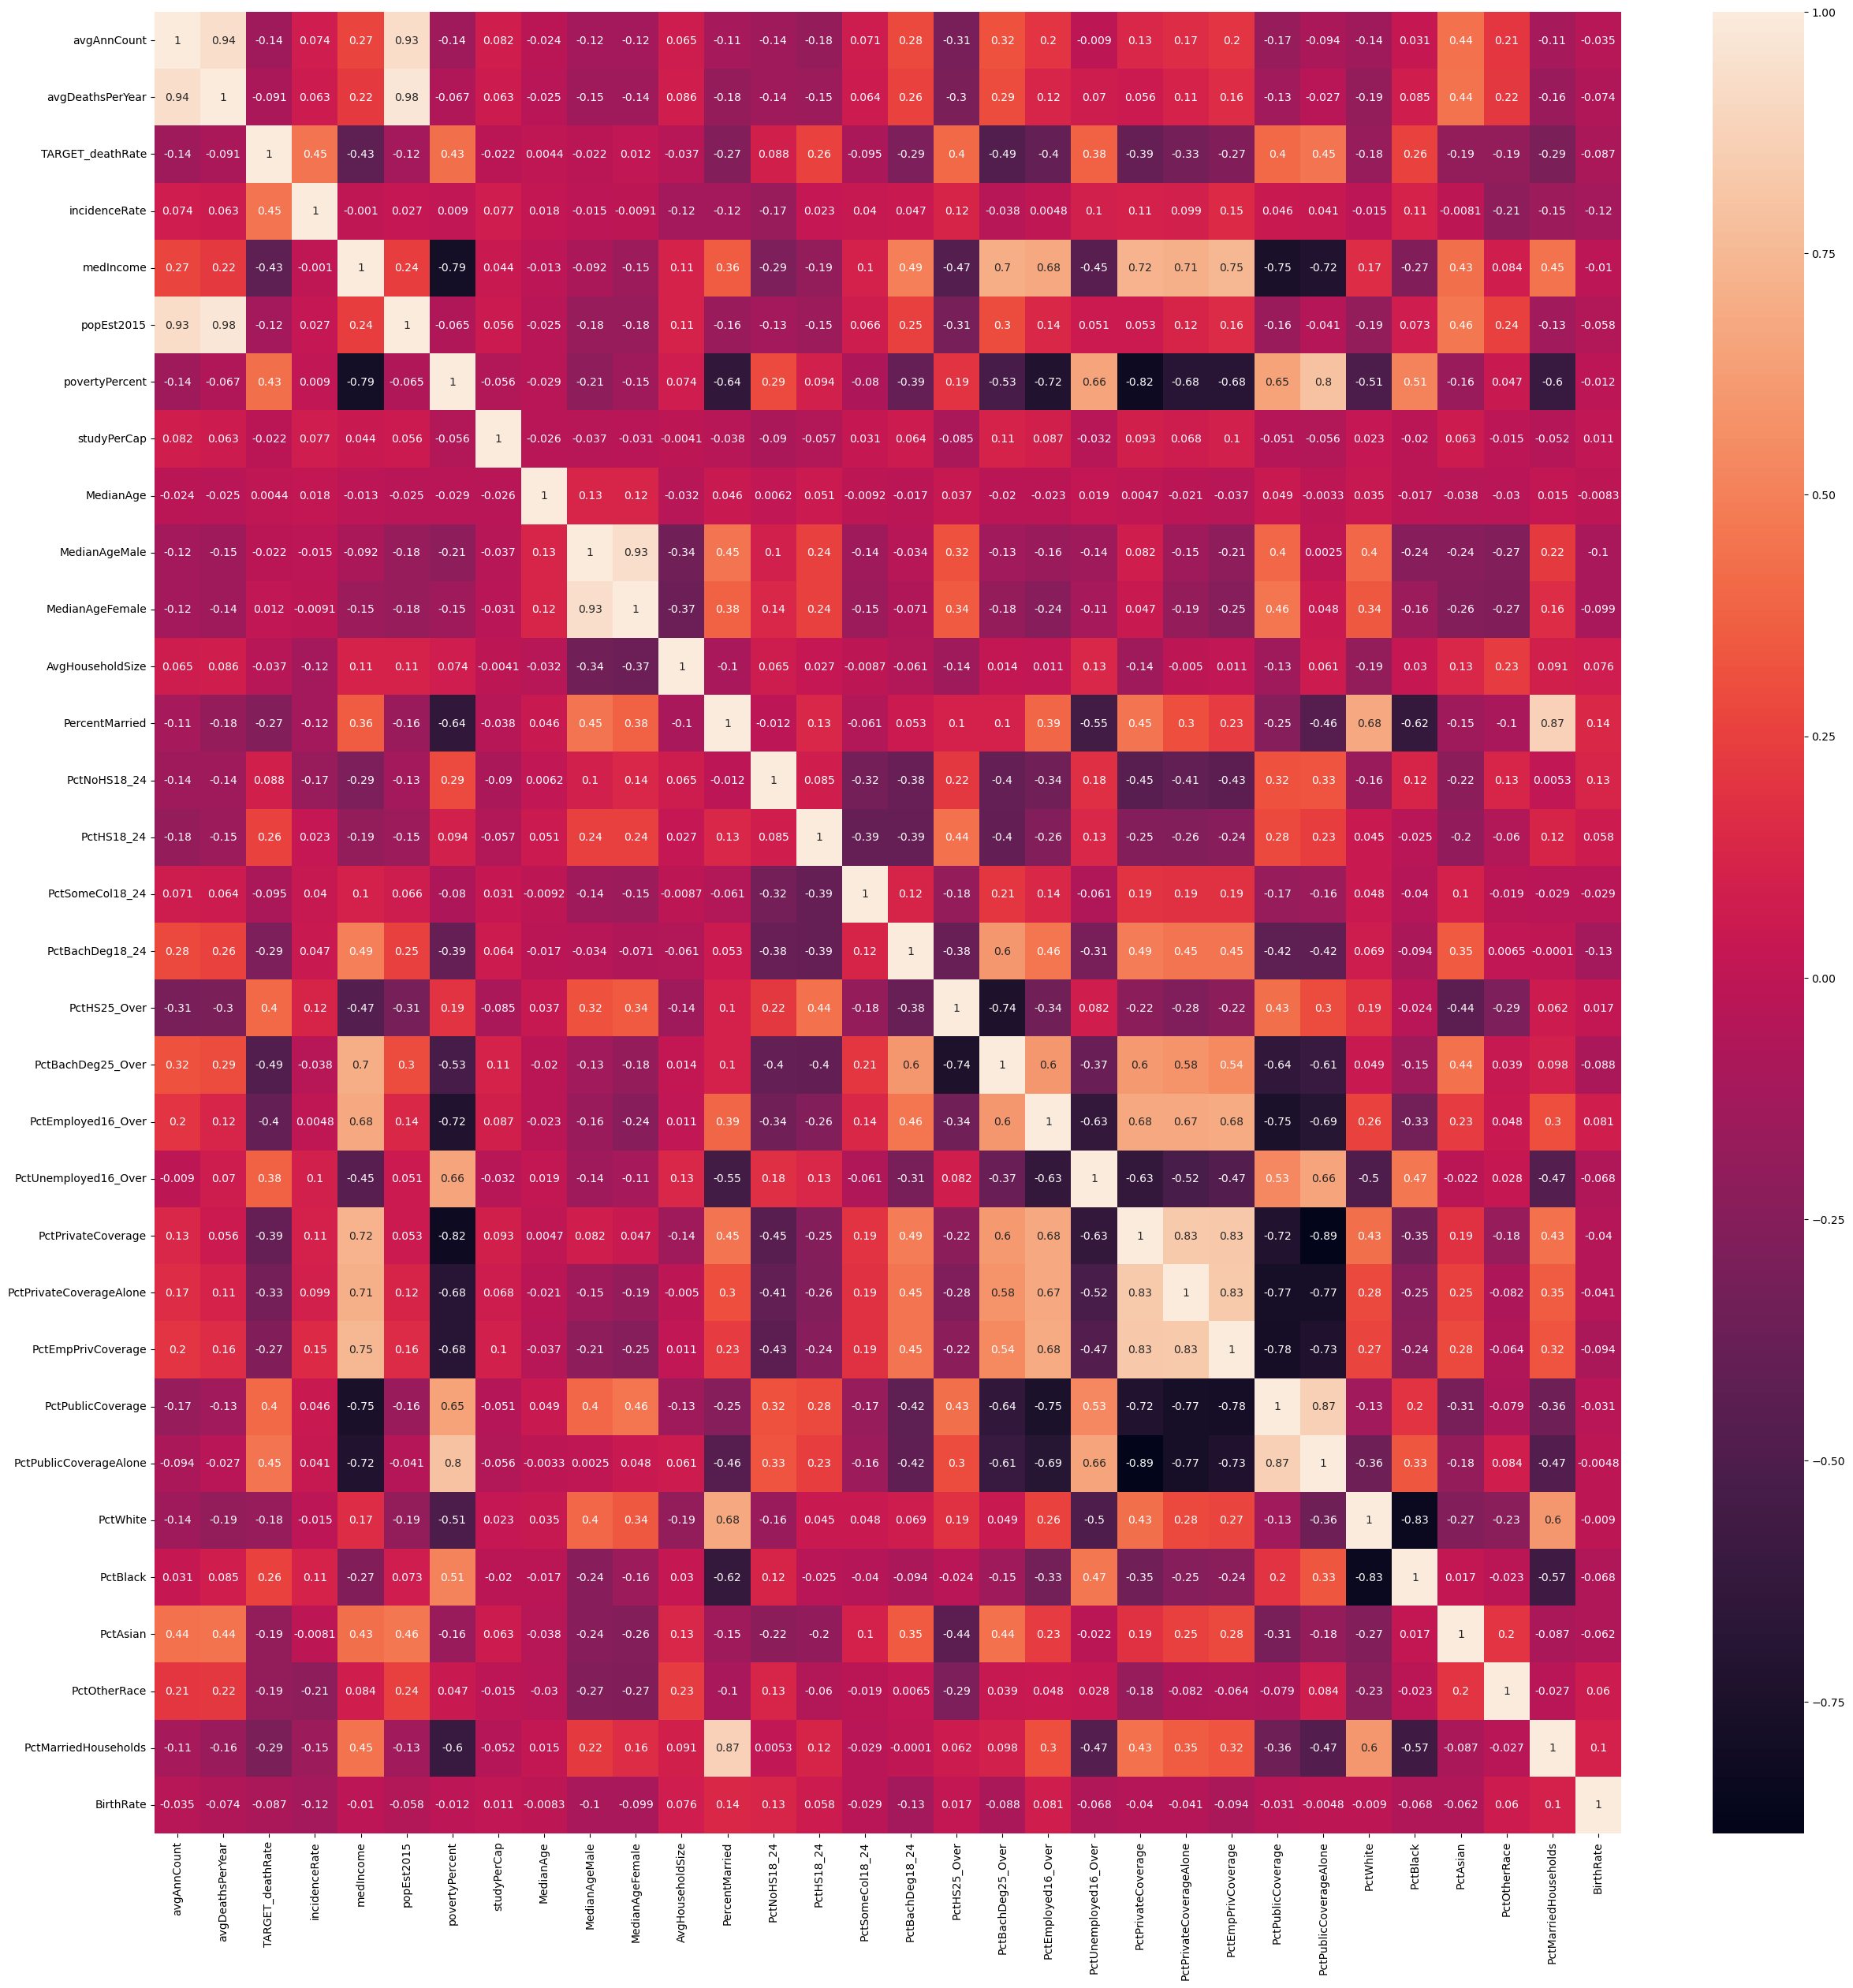

In [8]:
# Heatmap
plt.figure(figsize = (30, 30))
sb.heatmap(ds.corr(), annot = True)

In [9]:
# Scatter between all the independet features and dependent variable 
ds_deathrate = ds['TARGET_deathRate']
ds_without_target = ds.drop('TARGET_deathRate', axis=1)
ds_without_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3047 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   MedianAge                3047 non-null   float64
 8   MedianAgeMale            3047 non-null   float64
 9   MedianAgeFemale          3047 non-null   float64
 10  AvgHouseholdSize         3047 non-null   float64
 11  PercentMarried           3047 non-null   float64
 12  PctNoHS18_24             3047 non-null   float64
 13  PctHS18_24               3047 non-null   float64
 14  PctSomeCol18_24         

In [10]:
ds_original = pd.concat([ds_without_target, ds_deathrate], axis = 1)
ds_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3047 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   MedianAge                3047 non-null   float64
 8   MedianAgeMale            3047 non-null   float64
 9   MedianAgeFemale          3047 non-null   float64
 10  AvgHouseholdSize         3047 non-null   float64
 11  PercentMarried           3047 non-null   float64
 12  PctNoHS18_24             3047 non-null   float64
 13  PctHS18_24               3047 non-null   float64
 14  PctSomeCol18_24         

In [11]:
# Dependent and independent variable 
X = ds.iloc[:, 0:-1]
y = ds.iloc[:, -1]

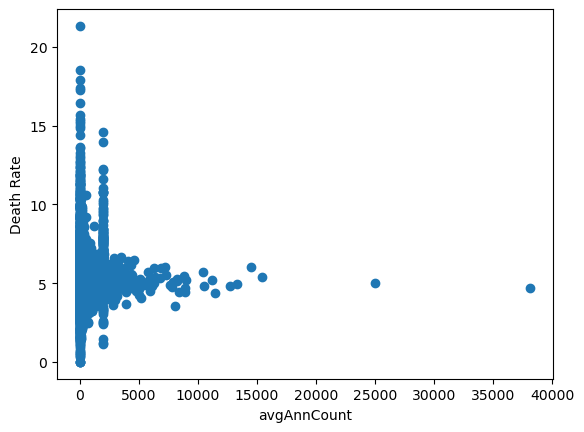

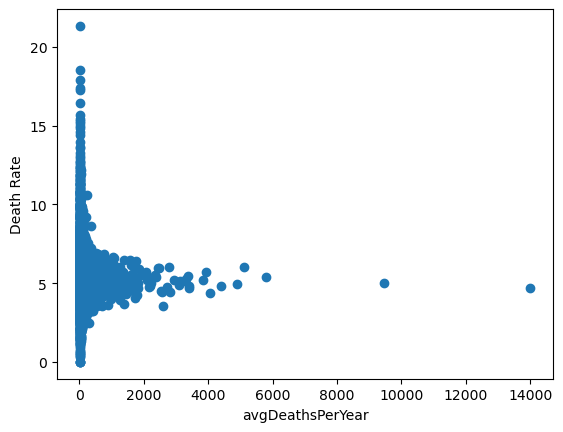

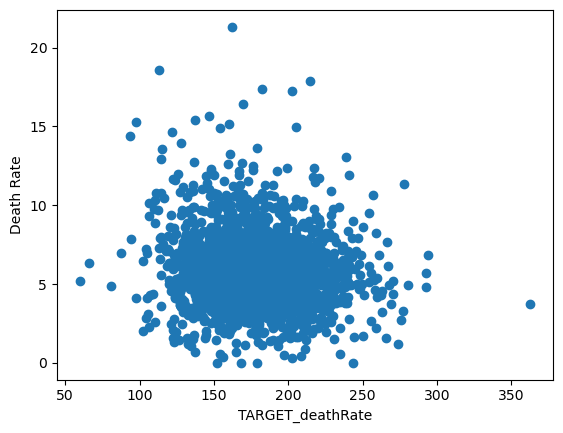

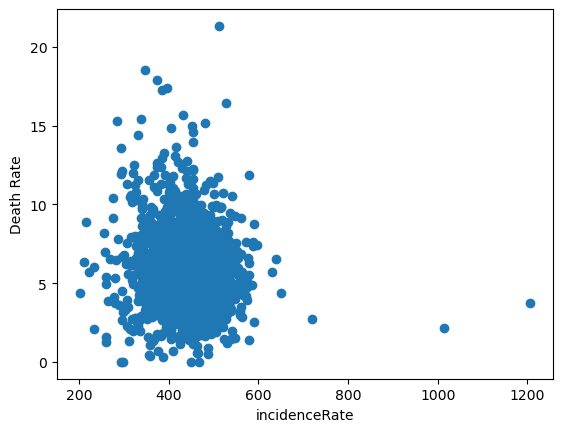

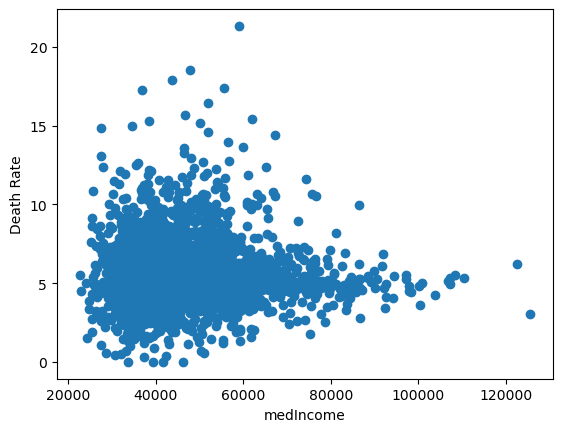

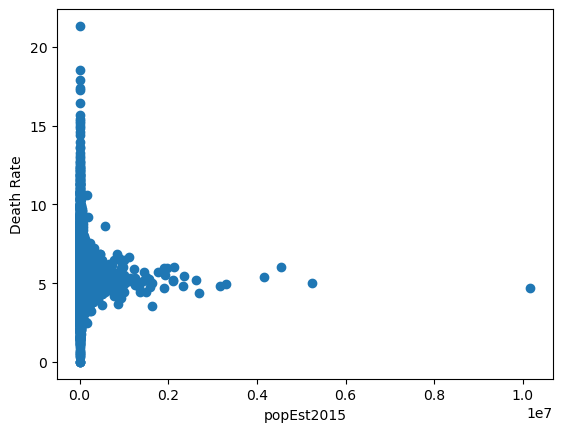

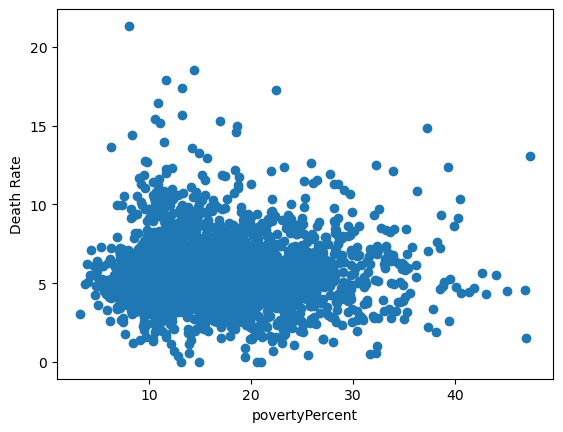

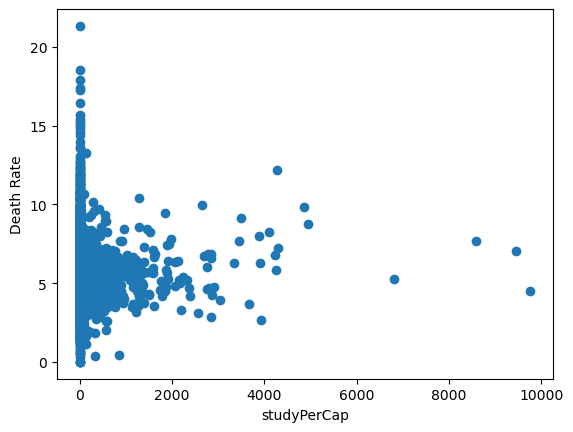

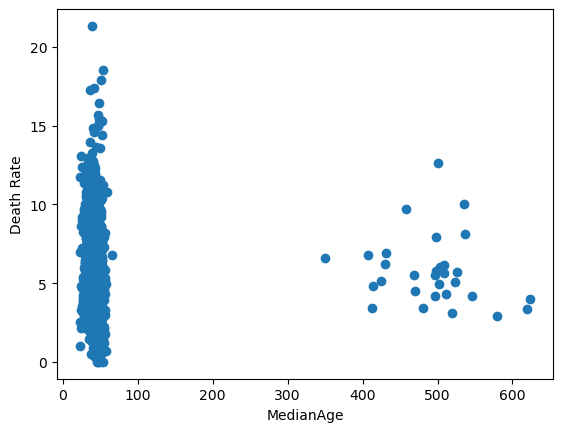

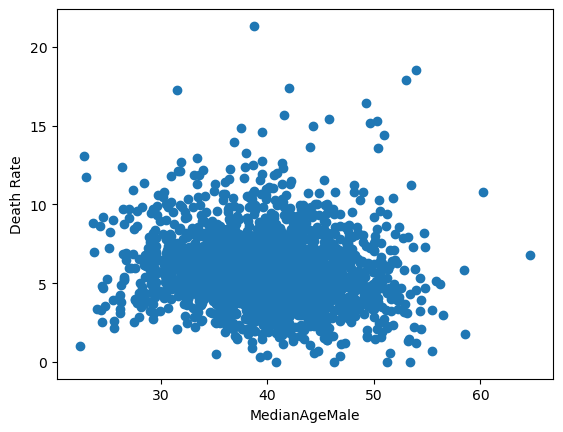

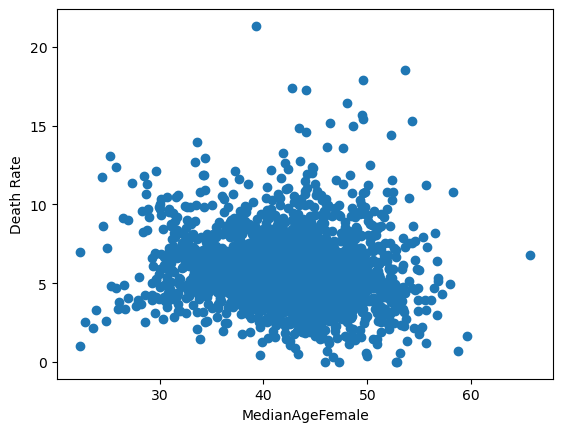

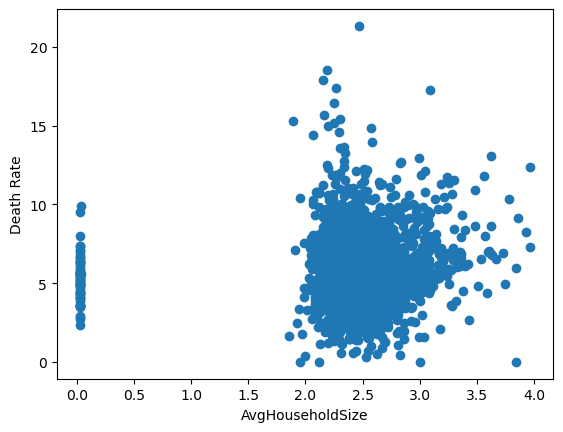

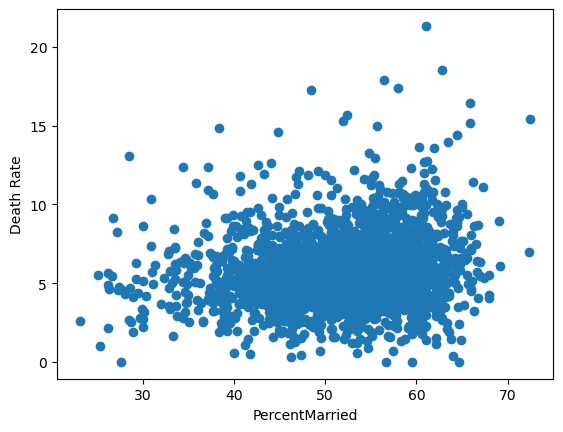

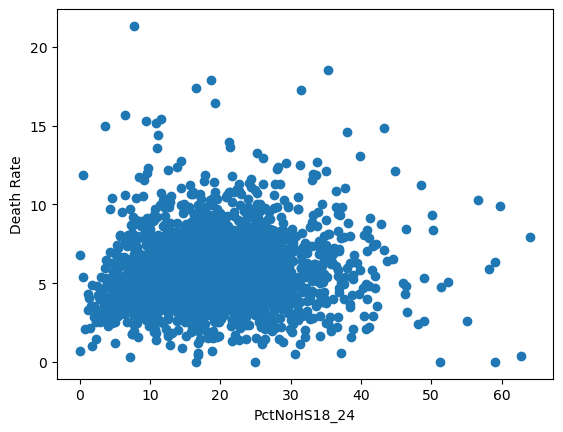

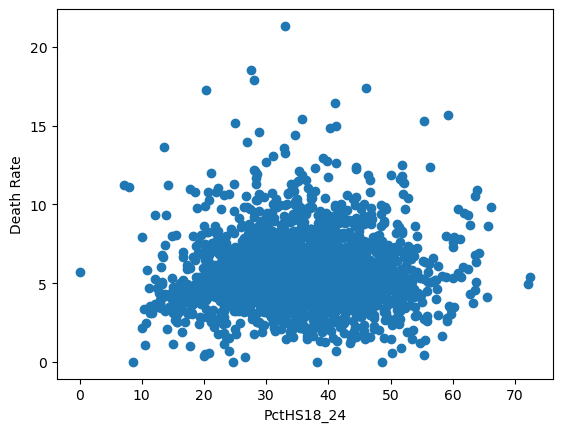

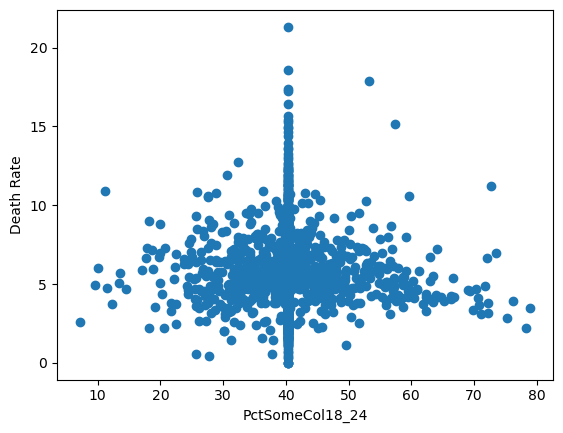

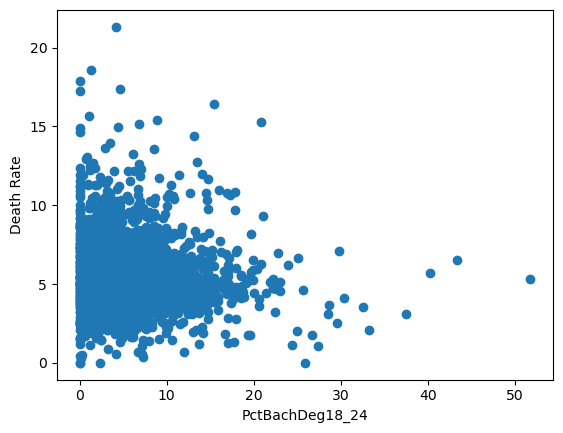

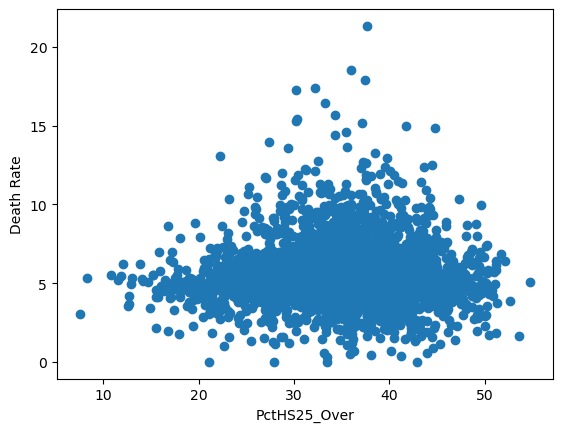

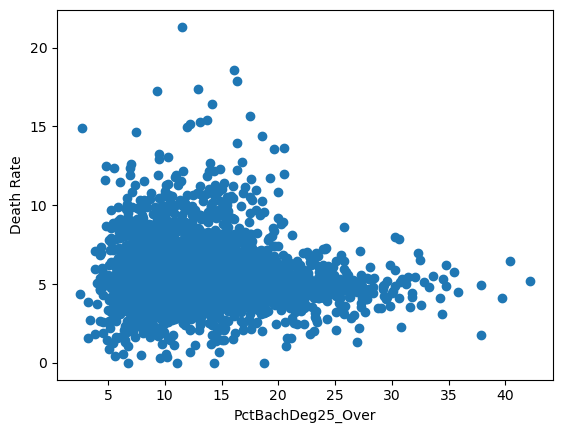

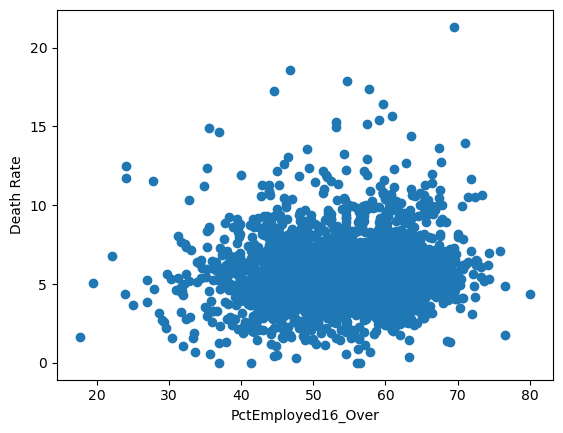

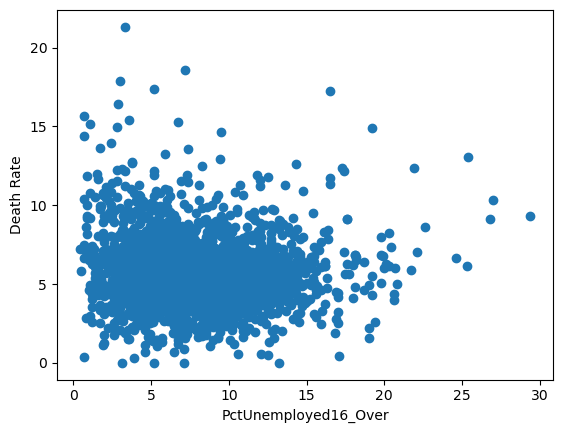

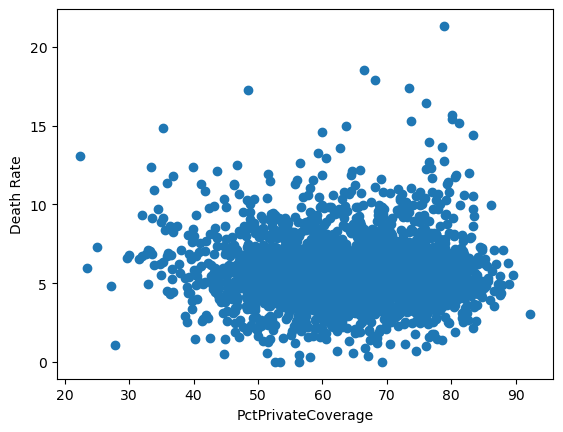

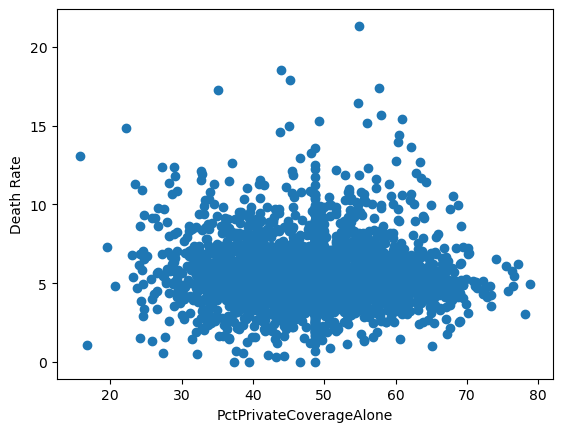

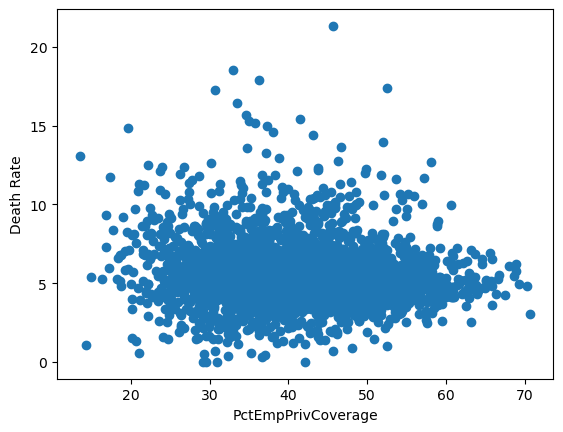

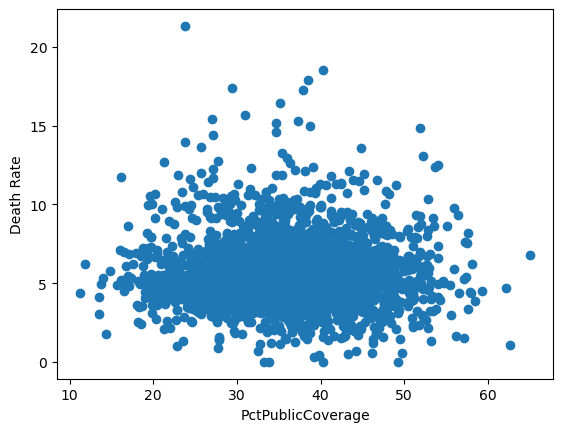

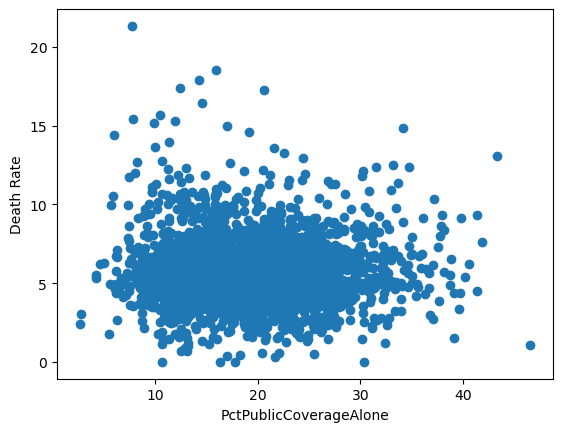

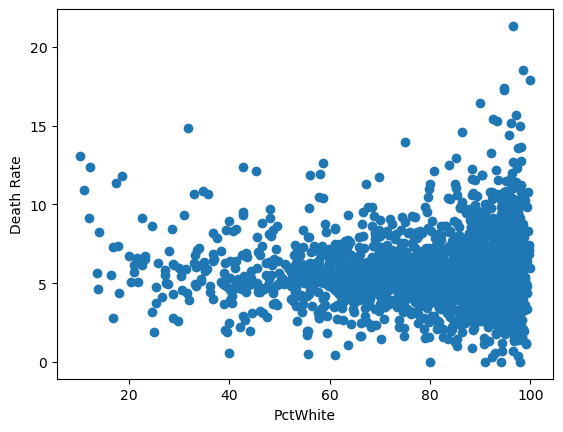

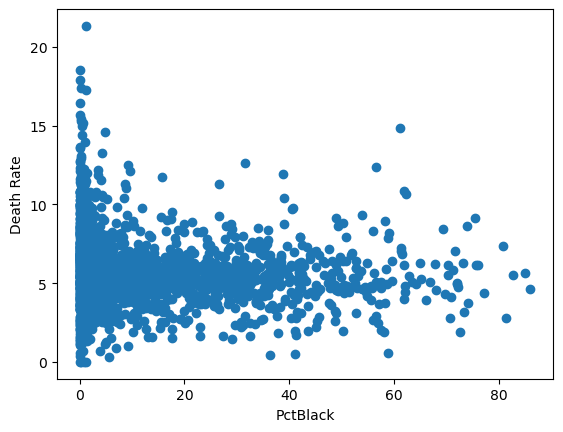

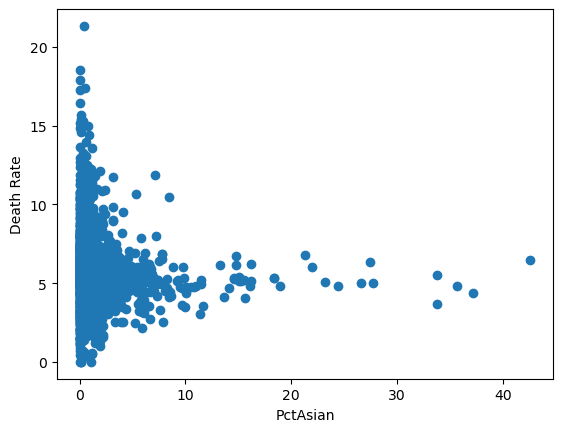

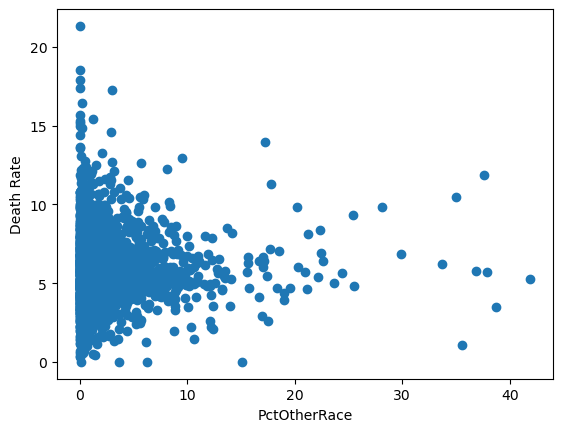

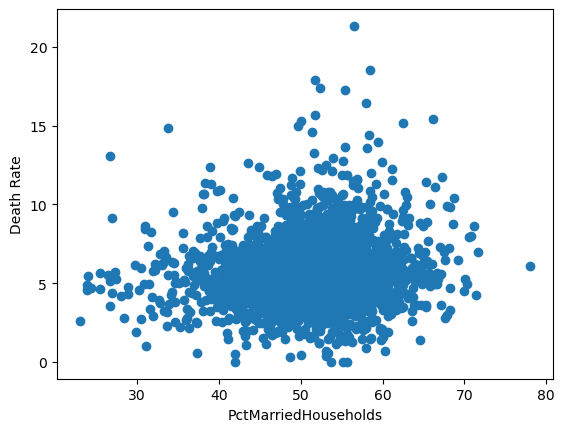

In [12]:
for feature in X.columns:
    plt.scatter(X[feature], y)
    plt.xlabel(feature)
    plt.ylabel("Death Rate")
    plt.show()

In [13]:
# Feature Scalling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Splitting 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2437
610
2437
610


### model

In [18]:
# Importing all of the learning algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [19]:
# Fitting all of the learning algorithms 
# ...
# Initializing the models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators = 100, max_depth = 100, random_state = 42)
xgb = XGBRegressor()
ada = AdaBoostRegressor()
svr = SVR()

# Fitting the mode
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
ada.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

## Evaluating all regression models...

In [77]:
# Prediction 
# Predicting on the test set
y_pred_lr = lr.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
ada_pred = ada.predict(X_test)
svr_pred = svr.predict(X_test)

### R2 score

In [78]:
# Computing the R2 scores
lr_r2 = r2_score(y_test, y_pred_lr)
knn_r2 = r2_score(y_test, knn_pred)
dt_r2 = r2_score(y_test, dt_pred)
rf_r2 = r2_score(y_test, rf_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
ada_r2 = r2_score(y_test, ada_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("KNN R2 score:", knn_r2)
print("Decision tree R2 score:", dt_r2)
print("Random forest R2 score:", rf_r2)
print("XGBoost R2 score:", xgb_r2)
print("AdaBoost R2 score:", ada_r2)
print("SVR R2 score:", svr_r2)
print("Linear Regression R2 score", lr_r2)

KNN R2 score: 0.041599268310519744
Decision tree R2 score: -0.943340275235957
Random forest R2 score: 0.10546069011983417
XGBoost R2 score: 0.0051431672871272704
AdaBoost R2 score: 0.05531957597738324
SVR R2 score: 0.15325344771173
Linear Regression R2 score 0.14914205125667235


### RMSE

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_lr = sqrt(mean_squared_error(y_test, y_pred_lr))
rms_knn = sqrt(mean_squared_error(y_test, knn_pred))
rms_dt = sqrt(mean_squared_error(y_test, dt_pred))
rms_rf = sqrt(mean_squared_error(y_test, rf_pred))
rms_xgb = sqrt(mean_squared_error(y_test, xgb_pred))
rms_ada = sqrt(mean_squared_error(y_test, ada_pred))
rms_svr = sqrt(mean_squared_error(y_test, svr_pred))

print("KNN RMSE:", rms_knn)
print("Decision tree RMSE:", rms_dt)
print("Random forest RMSE:", rms_rf)
print("XGBoost RMSE:", rms_xgb)
print("AdaBoost RMSE:", rms_ada)
print("SVR RMSE:", rms_svr)
print("Linear Regression RMSE", rms_lr)

KNN RMSE: 1.926567587891699
Decision tree RMSE: 2.743374559673717
Random forest RMSE: 1.8612743665223896
XGBoost RMSE: 1.9628674569583984
AdaBoost RMSE: 1.9127276640313549
SVR RMSE: 1.810870524309352
Linear Regression RMSE 1.815261561342701
